In [17]:
#import libraries

import pandas as pd
import numpy as np
import tensorflow as tf
import keras
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
print("Tensorflow version %s" %tf.__version__)

Tensorflow version 2.13.1


In [18]:
#create the dataset
from keras.preprocessing.image import ImageDataGenerator
from pathlib import Path

base_dir = Path('/home/mattia/Desktop/MLexercises/homework/homework2/train')
batch_size = 64
input_shape = ()

#basic transformation for the images
train_datagen = ImageDataGenerator(
    rescale = 1. / 255,
    zoom_range=0.1,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=False,
    validation_split= 0.2
    )

#create the train dataset
train_dataset = train_datagen.flow_from_directory(
    directory=base_dir,
    target_size=(96, 96),
    color_mode="rgb",
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=True,
    subset='training'
)

#create the validation dataset
validation_dataset = train_datagen.flow_from_directory(
    directory=base_dir,
    target_size=(96, 96),
    color_mode="rgb",
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=False,
    subset='validation'
)

test_datagen = ImageDataGenerator(
    rescale = 1. / 255
    )

base_dir = Path('/home/mattia/Desktop/MLexercises/homework/homework2/test')

#create the test_dataset
test_dataset = test_datagen.flow_from_directory(
    directory=base_dir,
    target_size=(96, 96),
    color_mode="rgb",
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=False
)


num_samples = train_dataset.n
num_classes = train_dataset.num_classes
input_shape = train_dataset.image_shape

classnames = [k for k,v in train_dataset.class_indices.items()]
img_h=input_shape[0]
img_w=input_shape[1]

print("Image input %s" %str(input_shape))
print("Classes: %r" %classnames)
print('Loaded %d training samples from  %d classes.' %(num_samples,num_classes))
print('Loaded %d test samples from %d classes.' %(validation_dataset.n,validation_dataset.num_classes))


Found 5096 images belonging to 5 classes.
Found 1273 images belonging to 5 classes.
Found 2749 images belonging to 5 classes.
Image input (96, 96, 3)
Classes: ['0', '1', '2', '3', '4']
Loaded 5096 training samples from  5 classes.
Loaded 1273 test samples from 5 classes.


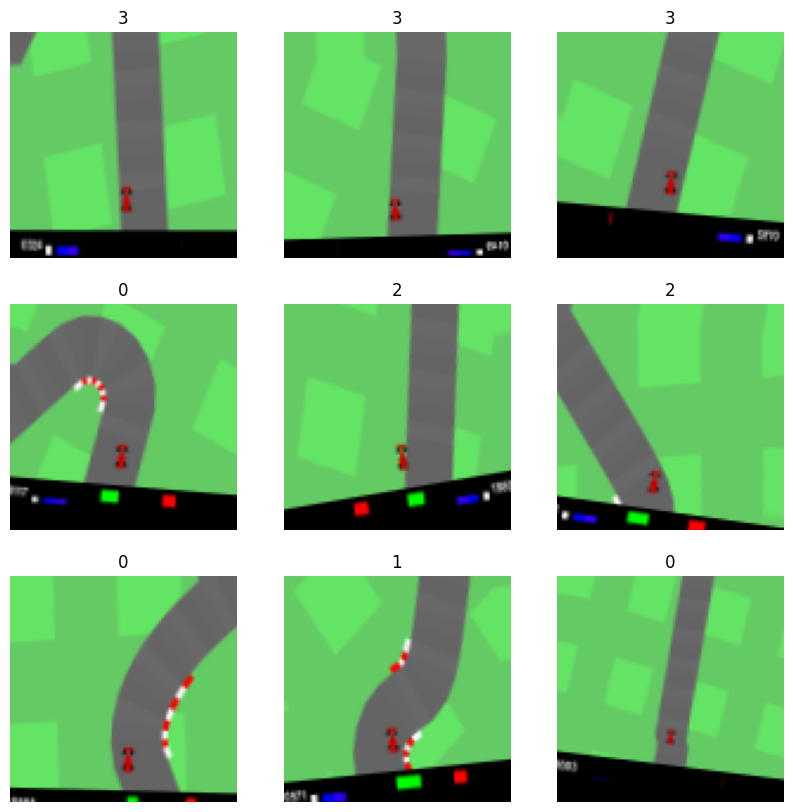

In [19]:
#Show some samples from the training dataset

import matplotlib.pyplot as plt

sample_images, sample_labels = next(train_dataset)

plt.figure(figsize=(10, 10))
for i in range(min(9, batch_size)):
    plt.subplot(3, 3, i + 1)
    plt.imshow(sample_images[i])
    plt.title(classnames[sample_labels[i].argmax()])
    plt.axis("off")
plt.show()


In [20]:
#Create the model
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten,\
                         Conv2D, MaxPooling2D
from keras.layers import BatchNormalization
from keras import regularizers
from keras import optimizers

def CarNet(input_shape, num_classes):

    model = Sequential()

    # C1 Convolutional Layer 
    model.add(Conv2D(filters=15, input_shape=input_shape, kernel_size=(5,5), dilation_rate= 2, activation='relu'))

    # C2 Convolutional Layer
    model.add(Conv2D(filters=20, kernel_size=(5,5), dilation_rate= 2, activation= 'relu'))
    # Pooling
    model.add(MaxPooling2D(pool_size=(2,2)))

    # C3 Convolutional Layer
    model.add(Conv2D(filters=30, kernel_size=(3,3), dilation_rate= 2, activation= 'relu'))
    # Pooling
    model.add(MaxPooling2D(pool_size=(2,2)))

    # Flatten
    model.add(Flatten())

    # D1 Dense Layer
    model.add(Dense(128, activation='relu'))
    # Dropout
    model.add(Dropout(0.4))
    # D2 Dense Layer
    model.add(Dense(96, activation='relu'))
    # Dropout
    model.add(Dropout(0.4))

    # Output Layer
    model.add(Dense(num_classes, activation='softmax'))

    # Compile
    optimizer = optimizers.RMSprop(learning_rate=0.0001)
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    return model

In [21]:
#Initialize the model
model = CarNet(input_shape,num_classes)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 88, 88, 15)        1140      
                                                                 
 conv2d_4 (Conv2D)           (None, 80, 80, 20)        7520      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 40, 40, 20)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 36, 36, 30)        5430      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 18, 18, 30)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 9720)             

In [22]:
#Train the model
steps_per_epoch=train_dataset.n//train_dataset.batch_size
val_steps=validation_dataset.n//validation_dataset.batch_size+1

try:
    history = model.fit(train_dataset, epochs=30,
                    steps_per_epoch=steps_per_epoch,
                    validation_data=validation_dataset,
                    validation_steps=val_steps)
except KeyboardInterrupt:
    pass

Epoch 1/30
79/79 [==============================] - 39s 481ms/step - loss: 1.5253 - accuracy: 0.3025 - val_loss: 1.4973 - val_accuracy: 0.3307
Epoch 2/30
79/79 [==============================] - 38s 477ms/step - loss: 1.5004 - accuracy: 0.3267 - val_loss: 1.4573 - val_accuracy: 0.4234
Epoch 3/30
79/79 [==============================] - 38s 474ms/step - loss: 1.4709 - accuracy: 0.3768 - val_loss: 1.4361 - val_accuracy: 0.4179
Epoch 4/30
79/79 [==============================] - 37s 470ms/step - loss: 1.4582 - accuracy: 0.3881 - val_loss: 1.4198 - val_accuracy: 0.4352
Epoch 5/30
79/79 [==============================] - 37s 468ms/step - loss: 1.4382 - accuracy: 0.4088 - val_loss: 1.4110 - val_accuracy: 0.4438
Epoch 6/30
79/79 [==============================] - 37s 468ms/step - loss: 1.4358 - accuracy: 0.4165 - val_loss: 1.3957 - val_accuracy: 0.4478
Epoch 7/30
79/79 [==============================] - 37s 471ms/step - loss: 1.4308 - accuracy: 0.4136 - val_loss: 1.4049 - val_accuracy: 0.4462

In [23]:
#Evaluate the model
val_steps=test_dataset.n//test_dataset.batch_size+1
loss, acc = model.evaluate_generator(test_dataset,steps=val_steps)
print('Test loss: %f' %loss)
print('Test accuracy: %f' %acc)

/tmp/ipykernel_3117/1112641325.py:3: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  loss, acc = model.evaluate_generator(test_dataset,steps=val_steps)


Test loss: 1.084801
Test accuracy: 0.639141


In [24]:
#Save the model
model.save("Model2.keras")